In [48]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Classification

In [49]:
fmnist_data = keras.datasets.fashion_mnist

In [50]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [51]:
x_train.shape

(60000, 28, 28)

In [52]:
x_test.shape

(10000, 28, 28)

In [53]:
y_train.shape

(60000,)

In [37]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

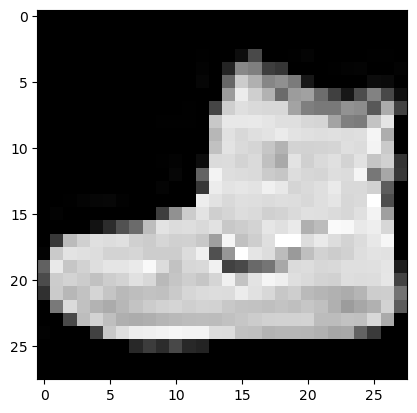

In [54]:
plt.imshow(x_train[0,], cmap="gray")

In [55]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model

In [56]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')

In [57]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    # keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal" ),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
     keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
    ])

In [58]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        78,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 75)             │         7,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,496 (353.50 KB)

 Trainable params: 88,578 (346.01 KB)

 Non-trainable params: 1,918 (7.49 KB)

In [59]:
model.layers

[<Flatten name=flatten_4, built=True>,
 <BatchNormalization name=batch_normalization_12, built=True>,
 <Dense name=dense_12, built=True>,
 <BatchNormalization name=batch_normalization_13, built=True>,
 <Activation name=activation_4, built=True>,
 <Dense name=dense_13, built=True>,
 <BatchNormalization name=batch_normalization_14, built=True>,
 <LeakyReLU name=leaky_re_lu_4, built=True>,
 <Dense name=dense_14, built=True>]

In [61]:
weights = model.layers[1].get_weights()

In [ ]:
weights

# Compile Model

In [ ]:
sgd = keras.optimizers.SGD(clipvalue=1.0)

In [62]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

NameError: name 'sgd' is not defined

# Fit Model

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.15)

In [ ]:
history.history

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

# Evaluate Test Model

In [ ]:
model.evaluate(x_test, y_test, verbose=0)

In [ ]:
x3 = x_test[1:3,:,:]
x3.shape

In [ ]:
plt.imshow(x3[0], cmap="gray")

In [ ]:
model.predict(x3).round(3)

In [ ]:
model.predict(x3).shape

In [ ]:
np.argmax(model.predict(x3),  axis=1)

In [ ]:
 y_test[1:3]